In [17]:
!pip install torch

In [41]:
#@title 1.3. IMPORT LIBRARY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#@title 1.4. RETRIEVE DATA
df_credit = pd.read_csv('/workspaces/functional-kan/phase_1/data/german_credit_data.csv')
df_credit['Risk'] = df_credit['Risk'].map({'good': 1, 'bad': 0})
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0


In [160]:
X = df_credit.drop(columns='Risk')
X = pd.get_dummies(X, dtype='int')
y = df_credit['Risk']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the result back to a DataFrame (optional)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

df = pd.concat([X_scaled, y], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42, stratify=df['Risk'])
df_train.head()



,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
328,-0.399832,0.146949,0.425949,1.252574,-0.670280,0.670280,-0.34796,0.634448,-0.466933,0.811403,...,3.856555,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208,1
891,0.919455,0.146949,-0.511199,-0.489762,-0.670280,0.670280,-0.34796,0.634448,-0.466933,0.811403,...,-0.259299,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208,1
255,-0.751642,-1.383771,1.469785,3.243815,-0.670280,0.670280,-0.34796,0.634448,-0.466933,-1.232433,...,-0.259299,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208,1
243,-0.751642,0.146949,-0.739460,-0.738668,1.491914,-1.491914,-0.34796,0.634448,-0.466933,0.811403,...,-0.259299,3.051111,-0.712949,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208,1
492,-0.751642,0.146949,-0.721029,-1.236478,1.491914,-1.491914,-0.34796,0.634448,-0.466933,-1.232433,...,-0.259299,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208,1


In [4]:
#@title 4.2. MLP PREDICTION TRIAL
n_simulation = 50
test_size = 0.3
total = 0

for idx in tqdm(range(n_simulation)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=idx)

    mlp = GaussianNB()
    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_test)
    total += (y_pred == y_test).mean()

accuracy = total / n_simulation
accuracy

100%|██████████| 50/50 [00:00<00:00, 187.90it/s]


0.6747333333333333

In [5]:
from kan import *
torch.set_default_dtype(torch.float64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
# model = KAN(width=[24, 1], grid=3, k=3, seed=42, device=device)

cpu


In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the result back to a DataFrame (optional)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

df_train = pd.concat([X_scaled, y], axis=1)
df_train.head()


,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
0,2.766456,0.146949,-0.745131,-1.236478,-0.670280,0.670280,-0.347960,0.634448,-0.466933,-1.232433,...,-0.259299,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208,1
1,-1.191404,0.146949,0.949817,2.248194,1.491914,-1.491914,-0.347960,0.634448,-0.466933,0.811403,...,-0.259299,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208,0
2,1.183312,-1.383771,-0.416562,-0.738668,-0.670280,0.670280,-0.347960,0.634448,-0.466933,0.811403,...,-0.259299,-0.327749,-0.712949,-0.110208,3.993639,-0.470108,-0.623610,-0.149983,-0.110208,1
3,0.831502,0.146949,1.634247,1.750384,-0.670280,0.670280,2.873893,-1.576173,-0.466933,0.811403,...,-0.259299,-0.327749,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208,1
4,1.535122,0.146949,0.566664,0.256953,-0.670280,0.670280,2.873893,-1.576173,-0.466933,0.811403,...,-0.259299,-0.327749,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208,0


In [161]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader


class CreditDataSet(Dataset):
    def __init__(self, df):
        super().__init__()
        # Convert data to a NumPy array and assign to self.data
        self.data = df.to_numpy()
        
    # Implement __len__ to return the number of data samples
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem__(self, idx):
        features = self.data[idx, :-1]
        # Assign last data column to label
        label = self.data[idx, -1]
        return features, label

dataset_train = CreditDataSet(df_train)
dataset_test = CreditDataSet(df_test)

# Create a DataLoader based on dataset_train
dataloader_train = DataLoader(
    dataset_train,
    batch_size=10,
    shuffle=True,
)

dataloader_test = DataLoader(
    dataset_test,
    batch_size=16,
    shuffle=False,
)

# Get a batch of features and labels
# features, labels = next(iter(dataloader_train))
# print(features, labels)

In [162]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Define the three linear layers
        self.fc1 = nn.Linear(24, 48)
        self.fc2 = nn.Linear(48, 16)
        self.fc3 = nn.Linear(16, 1)
        self.dropout = nn.Dropout(0.1)
        
    def forward(self, x):
        # Pass x through linear layers adding activations
        x = nn.functional.relu(self.fc1(x))
        # x = self.dropout(x)
        x = nn.functional.relu(self.fc2(x))
        # x = self.dropout(x)
        x = nn.functional.sigmoid(self.fc3(x))
        return x

class EarlyStopping:
    def __init__(self, patience=5, delta=0, path='checkpoint.pt', verbose=False):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
            path (str): Path to save the checkpoint.
            verbose (bool): If True, prints a message when early stopping is triggered.
        """
        self.patience = patience
        self.delta = delta
        self.path = path
        self.verbose = verbose
        self.counter = 0
        self.best_loss = np.Inf
        self.early_stop = False

    def __call__(self, val_loss, model):
        if val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.counter = 0
            self.save_checkpoint(model)
        else:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

    def save_checkpoint(self, model):
        """Save the model when validation loss decreases."""
        torch.save(model.state_dict(), self.path)
        if self.verbose:
            print(f"Validation loss decreased. Saving model to {self.path}.")

            
def train_model(optimizer, net, criterion, num_epochs, dataloader_train):
    for epoch in tqdm(range(num_epochs)):
        for features, labels in dataloader_train:
            optimizer.zero_grad()
            outputs = net(features.double())
            loss = criterion(outputs, labels.view(-1, 1))
            loss.backward()
            optimizer.step()

def evaluate_accuracy(net, dataloader):
    acc = Accuracy('binary').to(torch.device('cpu'))
    net.eval()  # Set to evaluation mode
    with torch.no_grad():
        for features, labels in dataloader:
            outputs = net(features.double())
            preds = (outputs >= 0.5).float()
            acc(preds, labels.view(-1, 1))
    return acc.compute().item()
    


100%|██████████| 200/200 [00:07<00:00, 26.92it/s]


Learning Rate: 0.01, Accuracy: 0.7871428728103638, Test: 0.699999988079071


100%|██████████| 200/200 [00:07<00:00, 25.94it/s]


Learning Rate: 0.05, Accuracy: 0.868571400642395, Test: 0.7233333587646484


100%|██████████| 200/200 [00:07<00:00, 26.44it/s]


Learning Rate: 0.1, Accuracy: 0.8785714507102966, Test: 0.7400000095367432


100%|██████████| 200/200 [00:07<00:00, 25.73it/s]


Learning Rate: 0.15, Accuracy: 0.8799999952316284, Test: 0.7266666889190674


100%|██████████| 200/200 [00:07<00:00, 27.24it/s]


Learning Rate: 0.2, Accuracy: 0.8771428465843201, Test: 0.7200000286102295


100%|██████████| 200/200 [00:07<00:00, 26.69it/s]


Learning Rate: 0.25, Accuracy: 0.8714285492897034, Test: 0.7266666889190674


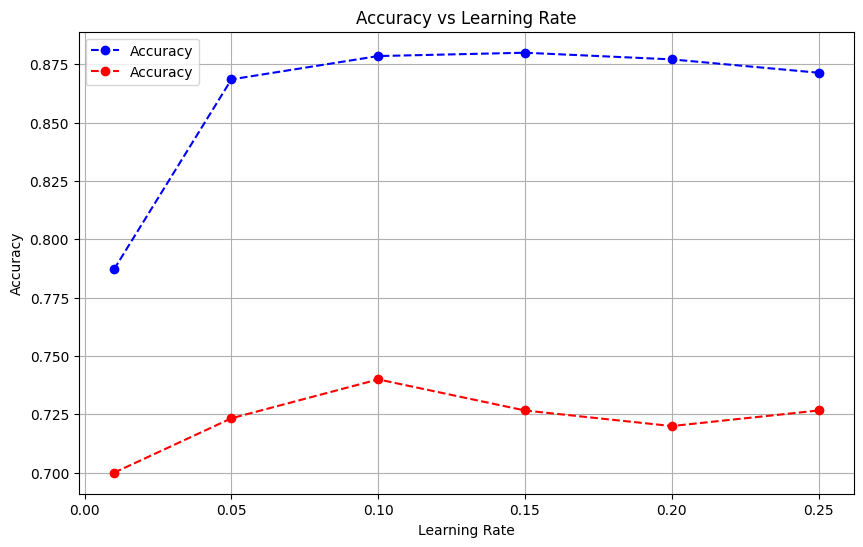

In [163]:
learning_rates = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25]
accuracy_train = []
accuracy_test = []

# Perform grid search over learning rates
for lr in learning_rates:
    net = Net()  # Re-initialize the network for each experiment
    optimizer = optim.SGD(net.parameters(), lr=lr)
    criterion = nn.BCEWithLogitsLoss()  # Use standard binary cross-entropy

    train_model(
        optimizer=optimizer,
        net=net,
        criterion=criterion,
        num_epochs=200,  # Use fewer epochs for quick testing
        dataloader_train=dataloader_train
    )
    
    # Evaluate accuracy on training data (or use a test/validation set if available)
    accuracy = evaluate_accuracy(net, dataloader_train)
    val = evaluate_accuracy(net, dataloader_test)

    print(f"Learning Rate: {lr}, Accuracy: {accuracy}, Test: {val}")

    accuracy_train.append(accuracy)
    accuracy_test.append(val)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, accuracy_train, marker='o', linestyle='--', color='b', label='Accuracy')
plt.plot(learning_rates, accuracy_test, marker='o', linestyle='--', color='r', label='Accuracy')

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Learning Rate')
plt.legend()
plt.grid(True)
plt.show()

In [137]:
from torchmetrics import Accuracy

net = Net()

# Define the SGD optimizer
optimizer = optim.SGD(net.parameters(), lr=0.15)
# pos_weight = torch.tensor([7/3])


train_model(
    criterion=nn.BCEWithLogitsLoss(),
    optimizer=optimizer,
    net=net,
    num_epochs=100,
    dataloader_train=dataloader_train
)

# Set up binary accuracy metric
acc = Accuracy('binary')

net.eval()
with torch.no_grad():
    for batch_idx, (features, labels) in enumerate(dataloader_train):
        # Get predicted probabilities for test data batch
        outputs = net(features.double())
        preds = (outputs >= 0.5).float()

        acc(preds, labels.view(-1, 1))



# Compute total test accuracy
test_accuracy = acc.compute()
print(f"Test accuracy: {test_accuracy}")
# print(preds.detach().cpu().numpy().flatten())

Test accuracy: 0.8379999995231628


In [29]:
dataset = dict()
dataset['train_input'] = torch.from_numpy(X_train.values)
dataset['train_label'] = torch.from_numpy(y_train.values)

dataset['test_input'] = torch.from_numpy(X_test.values)
dataset['test_label'] = torch.from_numpy(y_test.values)